In [1]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py
import torch

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

# WatChMaL imports
from io_utils.data_handling_2 import WCH5Dataset

# PyTorch imports
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

from collections import Counter 

In [2]:
path = "/fast_scratch/nuVAE_data/9M_IWCD_data_angles.h5"
f = h5py.File(path, 'r')
f.keys()

OSError: Unable to open file (unable to open file: name = '/fast_scratch/nuVAE_data/9M_IWCD_data_angles.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Extract the true event labels and energies from the .h5 dataset

In [36]:
labels   = np.array(f["labels"])
energies = np.array(f["energies"])
indices  = np.arange(labels.shape[0])

### Construct a mask to extract values of events in a given energy interval

In [37]:
min_energy = 40
max_energy = 45

energies_mask = np.logical_and(energies >= min_energy, energies <= max_energy)
energies_mask = energies_mask.reshape(energies_mask.shape[0])

In [38]:
print(energies[energies_mask][:10], len(energies[energies_mask]), len(energies), len(energies_mask))

[[40.223995]
 [42.31802 ]
 [43.164818]
 [40.78428 ]
 [43.166187]
 [42.97301 ]
 [40.080112]
 [40.791073]
 [43.484   ]
 [41.55955 ]] 26016 8987429 8987429


### Extract the event data, labels and energies of events in a given energy interval

In [40]:
local_indices  = indices[energies_mask] 
local_labels   = labels[energies_mask]
local_energies = energies[energies_mask]

In [42]:
local_event_data = np.array(f["event_data"][list(local_indices)])

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fc395fea438>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 678, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 660, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/opt/conda/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/opt/conda/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


In [43]:
print(len(local_event_data))

26016


### Distrbution of the labels

In [45]:
print(Counter(local_labels))

Counter({1: 15158, 0: 10858})


In [ ]:
local_event_charges = local_

In [141]:
sum_event_charges = np.sum(local_event_charges.reshape(local_event_charges.shape[0], -1), axis=1)
sum_event_timings = np.sum(local_event_timings.reshape(local_event_timings.shape[0], -1), axis=1)

In [142]:
local_event_charges.reshape(local_event_charges.shape[0], -1).shape

(142, 12160)

In [143]:
label_dict = {0:["gamma","red"], 1:["e","blue"], 2:["mu","green"]}

In [144]:
print(sum_event_charges.shape, sum_event_timings.shape, local_labels.shape)

(142,) (142,) (142,)


### Plot the per event sum charge distribution

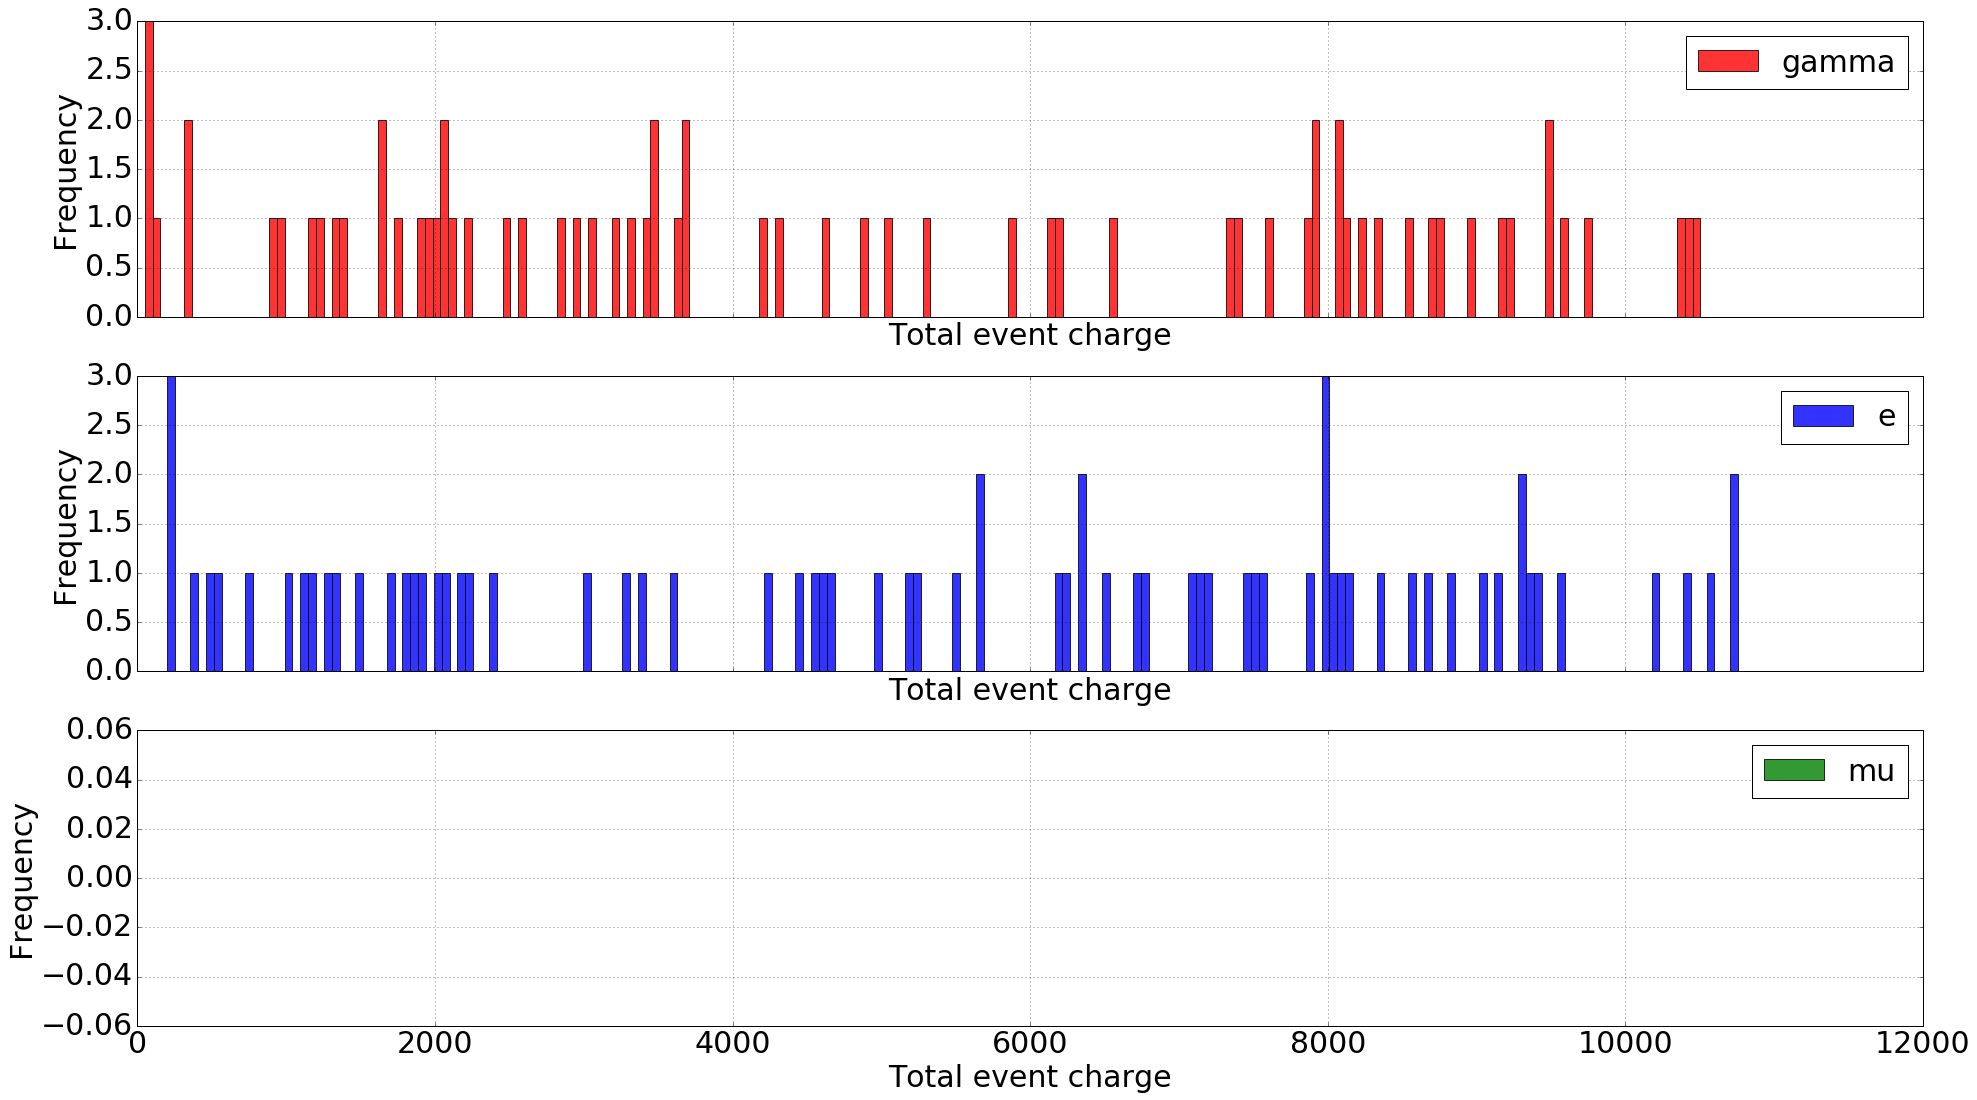

In [145]:
event_charge_dict = {}
for label in label_dict.keys():
    event_charge_dict[label] = sum_event_charges[local_labels == label]
    
fig, axes = plt.subplots(3, 1, figsize=(32,18), sharex=True)

for label in label_dict.keys():
    axes[label].hist(event_charge_dict[label], bins=200, density=False, label=label_dict[label][0], alpha=0.8,
                     color=label_dict[label][1])
    axes[label].legend(prop={"size":30})
    axes[label].set_xlabel("Total event charge", fontsize=30)
    axes[label].set_ylabel("Frequency", fontsize=30)
    axes[label].tick_params(axis="both", labelsize=30)
    axes[label].grid(True, which="both", axis="both")

### 2. Number of PMTs hit in an event

### PMT charge distribution in a single event

### So we will treat any non-zero charge PMT as a hit

In [146]:
event_charge_dict = {}
for label in label_dict.keys():
    label_events = event_charges[labels == label]
    label_events = label_events.reshape(label_events.shape[0], -1)
    label_events = [event[event > 0] for event in label_events]
    label_events = [event.shape[0] for event in label_events]
    
    event_charge_dict[label] = label_events
    
fig, axes = plt.subplots(3, 1, figsize=(32,18), sharex=True)

for label in label_dict.keys():
    axes[label].hist(event_charge_dict[label], bins=200, density=False, label=label_dict[label][0], alpha=0.8,
                     color=label_dict[label][1], range=(0, 200))
    axes[label].legend(prop={"size":30})
    axes[label].set_xlabel("Number of PMT hits", fontsize=30)
    axes[label].set_ylabel("Frequency", fontsize=30)
    axes[label].tick_params(axis="both", labelsize=30)
    axes[label].set_yscale("log")
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylim(bottom=1)

KeyboardInterrupt: 

### Example showing what is happening in the snippet above

In [ ]:
events = event_charges[0:2]
events = events.reshape(events.shape[0], -1)

In [ ]:
print(events.shape)

In [ ]:
events = [event[event > 0] for event in events]
print(len(events))

In [ ]:
print(events[0].shape, events[1].shape)

In [ ]:
events = [event.shape[0] for event in events]
print(events)